<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/Copy_of_S9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pip install Albumentation Library**

In [1]:
from __future__ import print_function
%matplotlib inline

# mount your gdrive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# add library path in your default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library')
!ls "/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library"


BN_GBN.py	   execute.py		     resNet.py	       visualizeData.py
cifar10_models.py  image_transformations.py  rohan_library.py
DataLoaders.py	   __pycache__		     utils.py


In [0]:
!cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/rohan_library.py' 'rohan_library.py'
!cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/execute.py' 'execute.py'
!cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/resNet.py' 'resNet.py'
# !cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/DataLoaders.py' 'DataLoaders.py'
!cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/utils.py' 'utils.py'
!cp '/content/drive/My Drive/EVA4B2-TSAI/EVA4_Library/image_transformations.py' 'image_transformations.py'

# I had no option other than copying the required files to a diff external directory and them import from there
# also there's easycolab which i will implement later

**Import Packages from Drive**

In [0]:
from rohan_library import *
import execute

from resNet import ResNet18
import utils
import image_transformations 

In [0]:
import torch

class DataLoaders:
  def __init__(self, batch_size=128, shuffle=True, num_workers=4, pin_memory=True, seed=1):
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')  # set device to cuda

    if use_cuda:
      torch.manual_seed(seed)
    
    self.dataLoader_args = dict(batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True ) if use_cuda else dict(batch_size=1, shuffle=True, num_workers = 1, pin_memory = True)

  def dataLoader(self, data):
    return torch.utils.data.DataLoader(data,**self.dataLoader_args )


**Albumentation Transforms Main Code**

In [0]:
from torchvision import transforms
import numpy as np
import random
from albumentations import HorizontalFlip, Compose, RandomCrop, Normalize, Rotate, pytorch
from albumentations.pytorch import ToTensor

# create a albumentation class to define test & train transformations 
class albumentationTransform(object): 
  def __init__(self, train = True):
    """Create a Data Transformation Pipeline """
    transformsList = []
    channel_means = (0.5, 0.5, 0.5)
    channel_stdevs = (0.5, 0.5, 0.5)
  
    if train:
      transformsList += [Rotate(-10.0, 10,0)]
      transformsList += [HorizontalFlip(0.5)]
      # transformsList += [RandomCrop(height = 2, width = 2, p=0.5)]
    
    transformsList += [Normalize(mean = channel_means, std = channel_stdevs, always_apply=True),
                       ToTensor()]
  
    self.transform = Compose(transformsList)

  # def trainTransforms(self, mean, std):
  #   albTrainTrans = Compose([
  #                           #  Rotate(-10.0, 10.0),
  #                           #  HorizontalFlip(0.5),
  #                            Normalize(mean = mean, std = std, always_apply=True),
  #                            pytorch.ToTensorV2(always_apply=True),
  #   ])
  #   return albTrainTrans;

  
  # def testTransforms(self, mean, std):
  #   albTestTrans = Compose([
  #                           Normalize(mean = mean, std = std, always_apply = True),
  #                           pytorch.ToTensorV2(always_apply=True),
  #   ])

  #   return albTestTrans;


# class normalTrans:
#   def __init__(self, transforms):
#     self.transforms = transforms  

  def __call__(self, image):
    """Process the image through data transformation pipeline """

    img = np.array(image)
    img = self.transform(image = img)['image']
    return img


**Albumentation Transformations**

In [0]:
import albumentations as alb

# create an instance albumentationTransform
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)

# albT = albumentationTransform()


trainAlbTrans = albumentationTransform(train=True)
testAlbTrans = albumentationTransform()



In [0]:
# #-------------------------NORMAL IMAGE TRANSFORMS-----------------


# channel_means = (0.5, 0.5, 0.5)
# channel_stdevs = (0.5, 0.5, 0.5)

# fillMeans = (np.array(channel_means)*255).astype(np.uint8)
# trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

# trainTrans = trans.train_transforms([
#                                      transforms.RandomRotation((-15.0, 15.0), fill=tuple(fillMeans)),
#                                      transforms.RandomHorizontalFlip(p=0.5),
#                                      transforms.RandomVerticalFlip(p=0.5)
# ])
# testTrans = trans.test_transforms()

**Load Train & Test Dataset**

In [8]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = trainAlbTrans)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = testAlbTrans)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: <__main__.albumentationTransform object at 0x7faffdc57358>

**DataLoaders for Train & Test Dataset**

In [0]:
dl = DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [0]:
iter(trainLoader).next()

**Display Training Images**

In [11]:
dataiter = iter(trainLoader)

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


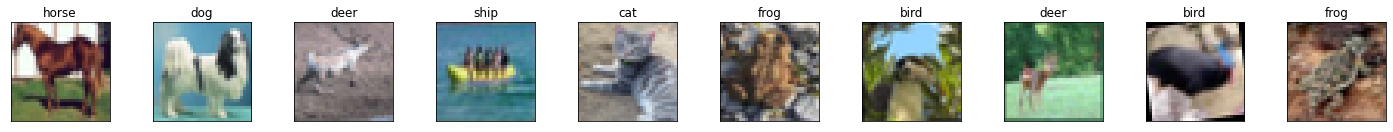

In [12]:
 def imshow(img):
        img = img / 2 + 0.5  # unnormalize
        plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def showImagesfromdataset(dataiterator, classes):
        images, labels = dataiterator.next()
        images = images.numpy()  # convert images to numpy for display

        # plot the images in the batch, along with the corresponding labels
        fig = plt.figure(figsize=(25, 4))
        # display 20 images
        for i in range(len(classes)):
          # for idx in np.arange(5):


          
            ax = fig.add_subplot(2, 20 / 2, i + 1, xticks=[], yticks=[])
            imshow(images[i])
            ax.set_title(classes[labels[i]])

showImagesfromdataset(dataiter,classes)

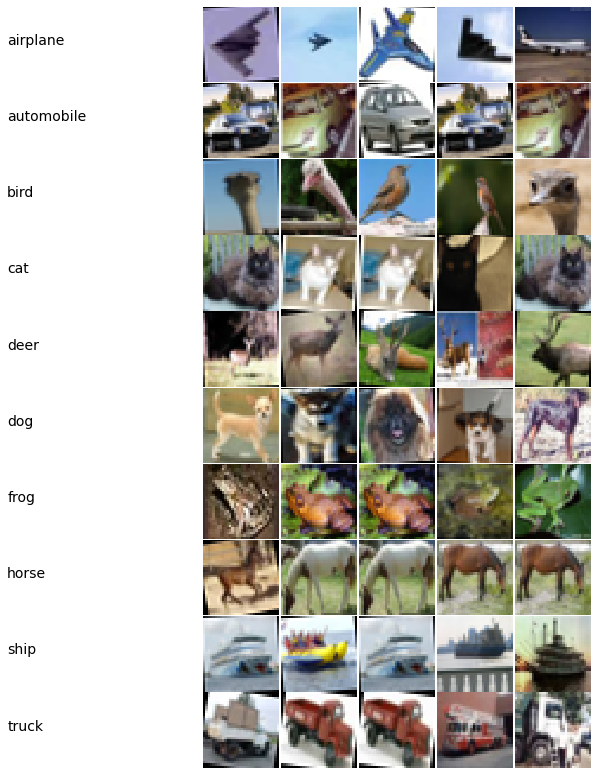

In [13]:
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i] # if not unnormalized then the resulting images will be dark and not visible
  return np.transpose(img, (1,2,0))


num_classes = 10
# display 10 images from each category. 
class_names = ('airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck')

r, c = 10, 10
n = 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1) # (10, 10, i*10+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1) # (10, 10, i*10+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [14]:
#Model Summary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)

model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

Device set to  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-1

In [15]:
incorrectSamples = []
model = ResNet18().to(device)


criterion = utils.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs = 25)

model1 = execute.Test_Train()
EPOCHS = 25

for epoch in range(1, EPOCHS+1):
  print('EPOCH: ',epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, criterion, L1lambda = 1e-5 )

  model1.test(model, device, testLoader, 'model1.pt', criterion, incorrectSamples )

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=2.2744545936584473 Batch_id=390 Accuracy=48.54: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.9704).  Saving model ...

Test set: Average loss: 0.9704, Accuracy: 5323/10000 (53.23%)

EPOCH:  2


Loss=1.954674482345581 Batch_id=390 Accuracy=67.59: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.9704 --> 0.9338).  Saving model ...

Test set: Average loss: 0.9338, Accuracy: 6773/10000 (67.73%)

EPOCH:  3


Loss=1.803689956665039 Batch_id=390 Accuracy=74.21: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.9338 --> 0.4290).  Saving model ...

Test set: Average loss: 0.4290, Accuracy: 6741/10000 (67.41%)

EPOCH:  4


Loss=1.379546880722046 Batch_id=390 Accuracy=78.74: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7339, Accuracy: 7379/10000 (73.79%)

EPOCH:  5


Loss=1.426170825958252 Batch_id=390 Accuracy=81.58: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3282, Accuracy: 7033/10000 (70.33%)

EPOCH:  6


Loss=1.0428180694580078 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6807, Accuracy: 7713/10000 (77.13%)

EPOCH:  7


Loss=1.0253970623016357 Batch_id=390 Accuracy=85.54: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2669, Accuracy: 7564/10000 (75.64%)

EPOCH:  8


Loss=0.9595420956611633 Batch_id=390 Accuracy=86.73: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4290 --> 0.0736).  Saving model ...

Test set: Average loss: 0.0736, Accuracy: 8296/10000 (82.96%)

EPOCH:  9


Loss=1.3414721488952637 Batch_id=390 Accuracy=88.19: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4036, Accuracy: 8035/10000 (80.35%)

EPOCH:  10


Loss=0.8247487545013428 Batch_id=390 Accuracy=89.43: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1771, Accuracy: 8033/10000 (80.33%)

EPOCH:  11


Loss=0.9436745643615723 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2955, Accuracy: 8102/10000 (81.02%)

EPOCH:  12


Loss=0.9534422159194946 Batch_id=390 Accuracy=91.27: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4572, Accuracy: 8046/10000 (80.46%)

EPOCH:  13


Loss=0.7955870628356934 Batch_id=390 Accuracy=91.88: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4257, Accuracy: 7867/10000 (78.67%)

EPOCH:  14


Loss=0.8857162594795227 Batch_id=390 Accuracy=92.91: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6477, Accuracy: 8484/10000 (84.84%)

EPOCH:  15


Loss=0.9190254211425781 Batch_id=390 Accuracy=93.54: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5879, Accuracy: 8147/10000 (81.47%)

EPOCH:  16


Loss=0.732447624206543 Batch_id=390 Accuracy=94.36: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2296, Accuracy: 8392/10000 (83.92%)

EPOCH:  17


Loss=0.8704017400741577 Batch_id=390 Accuracy=95.06: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3794, Accuracy: 8544/10000 (85.44%)

EPOCH:  18


Loss=0.6354263424873352 Batch_id=390 Accuracy=95.94: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2642, Accuracy: 8659/10000 (86.59%)

EPOCH:  19


Loss=0.5977149605751038 Batch_id=390 Accuracy=97.06: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0844, Accuracy: 8617/10000 (86.17%)

EPOCH:  20


Loss=0.5660703182220459 Batch_id=390 Accuracy=97.82: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0597, Accuracy: 8733/10000 (87.33%)

EPOCH:  21


Loss=0.48384055495262146 Batch_id=390 Accuracy=98.64: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0736 --> 0.0483).  Saving model ...

Test set: Average loss: 0.0483, Accuracy: 8801/10000 (88.01%)

EPOCH:  22


Loss=0.446976900100708 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0483 --> 0.0244).  Saving model ...

Test set: Average loss: 0.0244, Accuracy: 8906/10000 (89.06%)

EPOCH:  23


Loss=0.4258502721786499 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0856, Accuracy: 8931/10000 (89.31%)

EPOCH:  24


Loss=0.41586601734161377 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8674, Accuracy: 8971/10000 (89.71%)

EPOCH:  25


Loss=0.41513368487358093 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]



Test set: Average loss: 0.7790, Accuracy: 8948/10000 (89.48%)



In [44]:

!pip install pytorch-gradcam


import os
import PIL
import torch
import numpy as np
from torchvision import transforms
from torchvision.utils import make_grid, save_image

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def grad_cam(img, model, layer):
	configs = [dict(model_type='resnet', arch=model, layer_name=layer)]
	
	for config in configs:
		config['arch'].to(device).eval()
	
	torch_img = transforms.Compose([transforms.ToTensor()])(img).to(device)
	normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
	
	cams = [[cls.from_config(**config) for cls in (GradCAM, GradCAMpp)] for config in configs]	

	images = []
	for gradcam, gradcam_pp in cams:
		mask, _ = gradcam(normed_torch_img)
		heatmap, result = visualize_cam(mask, torch_img)

		mask_pp, _ = gradcam_pp(normed_torch_img)
		heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)

		images.extend([torch_img.cpu(), heatmap, heatmap_pp, result, result_pp])

	return images


     |████████████████████████████████| 6.0MB 13.1MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp36-none-any.whl size=5269 sha256=13d79a205322b5414792e3ca4d88e8c496f346f97e0f500ba5e682ddecea6b29
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [47]:
dataiter = iter(trainLoader)
images, labels = dataiter.next()
images

tensor([[[[ 0.4588,  0.4667,  0.4667,  ..., -0.7882, -0.7961, -0.8118],
          [ 0.4824,  0.4824,  0.4824,  ..., -0.6314, -0.6235, -0.6314],
          [ 0.4588,  0.4667,  0.4667,  ..., -0.7255, -0.8039, -0.7961],
          ...,
          [-0.5608, -0.5608, -0.5451,  ..., -0.0196, -0.0196, -0.0588],
          [-0.4118, -0.4275, -0.4196,  ..., -0.0196, -0.0980, -0.2549],
          [-0.3961, -0.4431, -0.4039,  ..., -0.0275, -0.0275, -0.0667]],

         [[ 0.4902,  0.4980,  0.4980,  ..., -0.8196, -0.8275, -0.8431],
          [ 0.5137,  0.5137,  0.5137,  ..., -0.6627, -0.6549, -0.6627],
          [ 0.4902,  0.4980,  0.4980,  ..., -0.7569, -0.8353, -0.8275],
          ...,
          [-0.7647, -0.7569, -0.7647,  ..., -0.0824, -0.0824, -0.1216],
          [-0.6941, -0.6863, -0.7098,  ..., -0.0824, -0.1608, -0.3176],
          [-0.6863, -0.7020, -0.7020,  ..., -0.0902, -0.0902, -0.1294]],

         [[ 0.5137,  0.5216,  0.5216,  ..., -0.8431, -0.8510, -0.8667],
          [ 0.5373,  0.5373,  